#TensorFlow Lite Model Maker : Create Models for On-Device Machine Learning 

##Model Training

###Installing TF Lite Model Maker Library

In [ ]:
#Installing TF Lite Model Maker Library using PiP
!pip install -q tflite-model-maker

###Importing Libraries

In [ ]:
#Importing necessary libraries and packages
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import zipfile
import matplotlib.pyplot as plt

#Downloading Dataset

In [ ]:
#Downloading the Cats and Dogs Dataset from Microosft Download
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/content/cats-and-dogs.zip"

#Saving Zip File
local_zip = '/content/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')

#Extracting Zip File
zip_ref.extractall('/content/')
zip_ref.close()

--2022-01-23 05:33:33--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 72.246.252.126, 2600:1402:2000:193::e59, 2600:1402:2000:1bb::e59
Connecting to download.microsoft.com (download.microsoft.com)|72.246.252.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/content/cats-and-dogs.zip’

/content/cats-and-d 100%[===================>] 786.68M   122MB/s    in 6.4s    

2022-01-23 05:33:39 (124 MB/s) - ‘/content/cats-and-dogs.zip’ saved [824894548/824894548]



In [ ]:
print(len(os.listdir('/content/Dataset2/Cat/')))
print(len(os.listdir('/content/Dataset2/Dog/')))

12499
12499


In [ ]:
#Creating Dataset Directory
!mkdir Dataset2

In [ ]:
!pip install --upgrade pillow

     |████████████████████████████████| 4.3 MB 5.1 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#Removing corrupted images in the dataset
!rm /content/PetImages/Cat/666.jpg
!rm /content/PetImages/Dog/11702.jpg

In [ ]:
#Converting Images in Cat Folder to png format
from PIL import Image
import glob
import os
from pathlib import Path

current_dir = Path('/content/PetImages/Cat').resolve()
otputdir = Path('/content/Dataset2').resolve()
out_dir = otputdir / "Cat"
#os.mkdir(out_dir)
cnt = 0

for img in glob.glob(str(current_dir / "*.jpg")):
    filename = Path(img).stem
    Image.open(img).save(str(out_dir / f'{filename}.png'))
    cnt = cnt + 1
    print(cnt)

In [ ]:
#Converting images in Dog Folder to png Format 
from PIL import Image
import glob
import os
from pathlib import Path

current_dir = Path('/content/PetImages/Dog/').resolve()
otputdir = Path('/content/Dataset2/').resolve()
out_dir = otputdir / "Dog"
#os.mkdir(out_dir)
cnt = 0

for img in glob.glob(str(current_dir / "*.jpg")):
    filename = Path(img).stem
    Image.open(img).convert('RGB').save(str(out_dir / f'{filename}.png'))
    cnt = cnt + 1
    print(cnt)

In [ ]:
#Loading Dataset using Dataloader
data = DataLoader.from_folder('/content/Dataset2')

INFO:tensorflow:Load image with size: 24998, num_label: 2, labels: Cat, Dog.


In [ ]:
#Splitting Dataset into training, validation and testing Data
train_data, rest_data = data.split(0.7)
validation_data, test_data = rest_data.split(0.67)

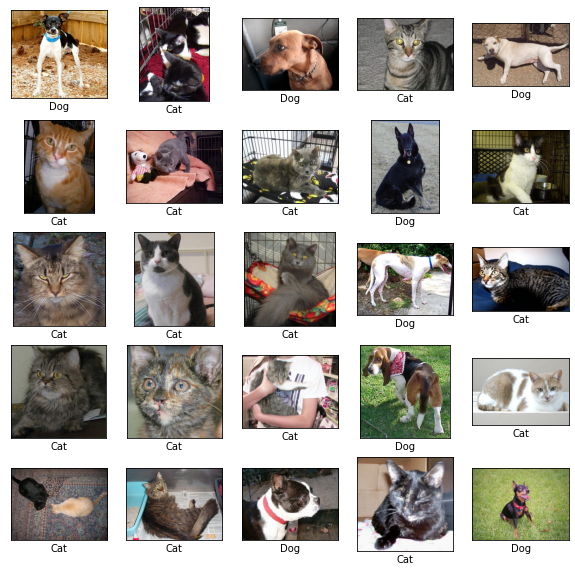

In [ ]:
#Visualising images in the dataset
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

#Model Training

In [ ]:
#Training model
model = image_classifier.create(train_data, model_spec=model_spec.get('efficientnet_lite4'), validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             11837936  
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 11,840,498
Trainable params: 2,562
Non-trainable params: 11,837,936
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
546/546 [==============================] - 167s 283ms/step - loss: 0.2345 - accuracy: 0.9876 - val_loss: 0.2172 - val_accuracy: 0.9936
Epoch 2/5
546/546 [==============================] - 153s 280ms/step - loss: 0.2181 - accuracy: 0.9947 - val_loss: 0.2152 - val_accuracy: 0.9938
Epoch 3/5
546/546 [==============================] - 151s 276ms/step - loss: 0.2160 - accuracy: 0.9950 - val_loss: 0.2142 - val_accuracy: 0.9934
Epoch 4/5
546/546 [==============================] - 149s 272ms/step - loss: 0.2148 - accuracy: 0.9958 - val_loss: 0.2136 - val_accuracy: 0.9940
Epoch 5/5
546/546 [==============================] - 150s 275ms/step - loss: 0.2142 - accuracy: 0.9958 - val_loss: 0.2133 - val_accuracy: 0.9942


###Model Evaluation on Test Dataset

In [ ]:
loss, accuracy = model.evaluate(test_data)

78/78 [==============================] - 60s 162ms/step - loss: 0.2152 - accuracy: 0.9935


#Model Conversion

###FP 16 Quantization

In [ ]:
config = QuantizationConfig.for_float16()

In [ ]:
model.export(export_dir='/content/drive/MyDrive/TFLiteBog2/Models/', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpaxx8huqz/assets


INFO:tensorflow:Assets written to: /tmp/tmpaxx8huqz/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp2rvgdrvr/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp2rvgdrvr/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/TFLiteBog2/Models/model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/TFLiteBog2/Models/model_fp16.tflite


###Dynamic Quantization

In [ ]:
config = QuantizationConfig.for_dynamic()

In [ ]:
model.export(export_dir='/content/drive/MyDrive/TFLiteBog2/Models/', tflite_filename='model_dynamic.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpqid_0igi/assets


INFO:tensorflow:Assets written to: /tmp/tmpqid_0igi/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpsg7c4wb0/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpsg7c4wb0/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/TFLiteBog2/Models/model_dynamic.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/TFLiteBog2/Models/model_dynamic.tflite


#Integer Quantization

In [ ]:
config = QuantizationConfig.for_int8(test_data)

In [ ]:
model.export(export_dir='/content/drive/MyDrive/TFLiteBog2/Models/', tflite_filename='model_int8.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmp0xc1hqmv/assets


INFO:tensorflow:Assets written to: /tmp/tmp0xc1hqmv/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpuunackc1/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpuunackc1/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/TFLiteBog2/Models/model_int8.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/TFLiteBog2/Models/model_int8.tflite


###Evaluating Quantized Models

In [ ]:
model.evaluate_tflite('/content/drive/MyDrive/TFLiteBog2/Models/model_fp16.tflite', test_data)

{'accuracy': 0.9935353535353535}

In [ ]:
model.evaluate_tflite('/content/drive/MyDrive/TFLiteBog2/Models/model_int8.tflite', test_data)

{'accuracy': 0.9931313131313131}

In [ ]:
model.evaluate_tflite('/content/drive/MyDrive/TFLiteBog2/Models/model_dynamic.tflite', test_data)

{'accuracy': 0.9935353535353535}